# Plants Seedlings Classification
## By: Swaraj Tripathy

In this project, I will be attempting to classify plant species using images of the plants. To accomplish this task, I will be using convolutional neural networks, and transfer learning. This application of neural networks will help agriculture workers complete their jobs more efficiently by reducing the amount of time they have to spend identifying seedling plants. This will help enable them to spend their time elswhere, ultimately improving profitability and crop yield.

## Exploratory Data Analysis


In [2]:
# importing the necessary libraries
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading in the Data

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# load in class labels as target variable
targets = pd.read_csv('/content/drive/My Drive/Labels.csv')
targets.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [5]:
# check the shape of the target variable
targets.shape

(4750, 1)

In [6]:
# check proportion of class labels as a percentage
round(targets.value_counts(normalize = True) * 100, 2)

Label                    
Loose Silky-bent             13.77
Common Chickweed             12.86
Scentless Mayweed            10.86
Small-flowered Cranesbill    10.44
Fat Hen                      10.00
Charlock                      8.21
Sugar beet                    8.11
Cleavers                      6.04
Black-grass                   5.54
Shepherds Purse               4.86
Common wheat                  4.65
Maize                         4.65
dtype: float64

In [7]:
# load in the images as numpy array
images = np.load('/content/drive/My Drive/images.npy')
images[0,0]

array([[ 35,  52,  78],
       [ 36,  49,  76],
       [ 31,  45,  69],
       [ 43,  58,  78],
       [ 56,  69,  89],
       [ 59,  71,  92],
       [ 67,  80,  97],
       [ 60,  75,  91],
       [ 47,  62,  82],
       [ 27,  49,  75],
       [ 26,  52,  77],
       [ 24,  51,  74],
       [ 27,  55,  80],
       [ 23,  57,  85],
       [ 16,  52,  81],
       [ 32,  59,  86],
       [ 45,  65,  88],
       [ 61,  78,  93],
       [ 62,  76,  89],
       [ 59,  70,  83],
       [ 56,  68,  81],
       [ 54,  67,  79],
       [ 53,  66,  77],
       [ 44,  54,  68],
       [ 46,  53,  69],
       [ 46,  51,  68],
       [ 39,  44,  59],
       [ 35,  42,  59],
       [ 33,  41,  63],
       [ 48,  59,  78],
       [ 74,  86, 101],
       [ 82,  97, 111],
       [ 73,  92, 106],
       [ 77,  97, 109],
       [ 79,  97, 110],
       [ 47,  61,  85],
       [ 40,  53,  78],
       [ 42,  60,  82],
       [ 48,  70,  93],
       [ 48,  75,  97],
       [ 56,  83, 101],
       [ 69,  98

In [8]:
# shape of the images file
images.shape

(4750, 128, 128, 3)

There are 4750 images of size 128 x 128 pixels. The images are represented in color as there are 3 channels for RGB.

### Converting Image Coloring

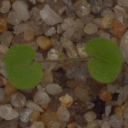

In [9]:
# check coloring of images with open_cv
cv2_imshow(images[0])

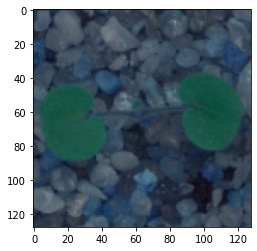

In [10]:
# image from matplotlib
plt.imshow(images[0]);

The open_cv image looks correct, implying that the images were generated in the BGR format. We will convert these images to RGB format so they look correct in the future analysis.

In [11]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Visiualizing Images By Class Label

In [12]:
# visualizing the images
def plot_images(images, labels):
  num_classes = 12                                                                # Number of Classes
  categories = np.unique(targets)   
  keys = dict(labels['Label'])                                                    # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows = 3
  cols = 4                                                                        # Defining number of columns = 4
  fig = plt.figure(figsize = (10, 8))                                             # Defining the figure size to 10x8
  uniq_keys = []                                                                  # Indexes for unique class labels
  x = 0                                                                           # Index placeholder
  for i in np.unique(targets):
    uniq_keys.append(list(dict(targets['Label']).keys())[list(dict(targets['Label']).values()).index(i)])
  for i in range(cols):
      for j in range(rows):
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[uniq_keys[x], :])                                      # Plotting the image 
          ax.set_title(keys[uniq_keys[x]])
          x += 1
  plt.show()

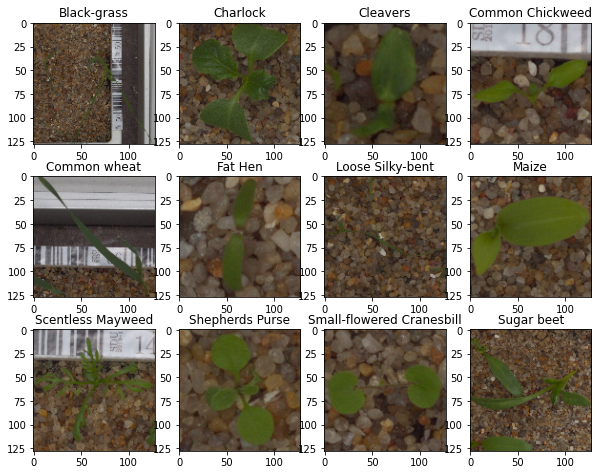

In [13]:
# plot an image of each unique class
plot_images(images, targets)

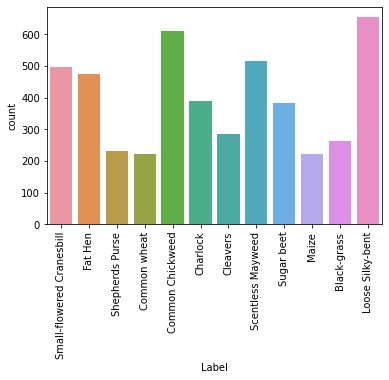

In [14]:
 # countplot of class labels to visualize proportions
 sns.countplot(targets['Label'])
 plt.xticks(rotation = 90);

Not all categories have even representation in the dataset, but the minority classes are not too small. This should not affect our model too much as the data is not too drastically imbalanced. We may consider data augmentation if the imbalance becomes an issue.

## Data Pre-processing

### Image Resizing

In [15]:
# reducing the size of images for computational efficiency
images_decreased = []
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append(cv2.resize(images[i], dimensions, interpolation = cv2.INTER_LINEAR))
images_decreased = np.array(images_decreased)

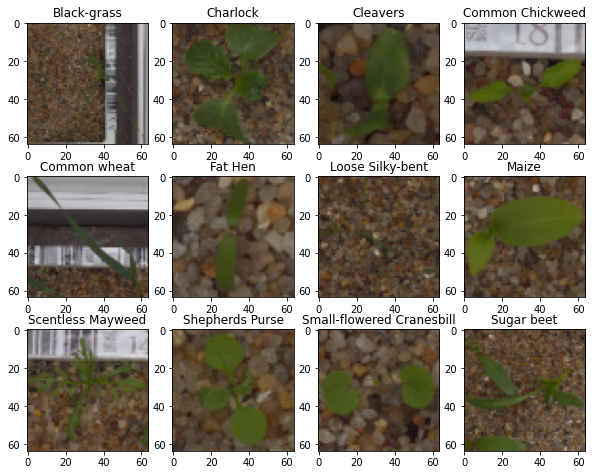

In [16]:
# plot images after resizing
plot_images(images_decreased, targets)

### Adding Gaussian Blur

In [17]:
# apply gaussian blur to the images to reduce noise within images
images_gb = []
for i in range(len(images_decreased)):
  images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize = (3, 3),sigmaX = 0))
images_gb = np.array(images_gb)

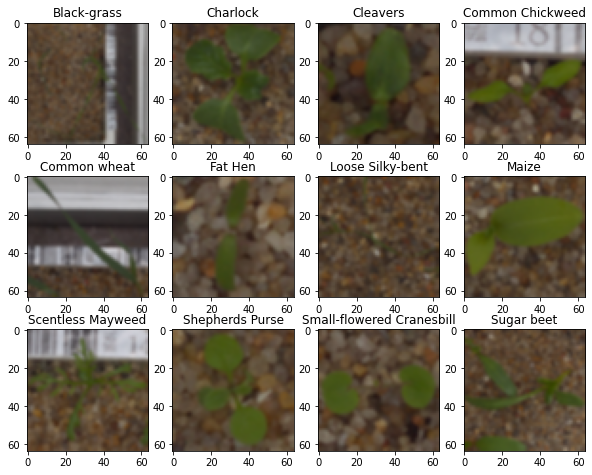

In [18]:
# plot resized images after gaussian blur
plot_images(images_gb, targets)

### Splitting the Data

In [19]:
# splitting the data into train, test, and validation sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_gb), targets , test_size = 0.1, random_state = 1, stratify = targets)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.1, random_state = 1, stratify = y_temp)

In [20]:
# check the shape of our data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Making the Data Compatible

In [21]:
# encoding the target labels using labelbinarizer
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test) 

### Normalizing Pixel Values

In [22]:
# normailizing pixel values to range from 0-1, as they currently range from 0-255
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

## Model Building: Convolutional Neural Network

In [23]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [24]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding another convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))

# Adding another max pooling layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation = 'relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation = 'softmax'))

# Using Adam optimizer
opt = Adam()

# Compile model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Recall', 'Precision'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [25]:
# fit the model on the training data
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs = 30,
            validation_data = (X_val_normalized, y_val_encoded),
            batch_size = 32,
            verbose = 2
)

Epoch 1/30
121/121 - 14s - loss: 2.3880 - accuracy: 0.1890 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.1862 - val_accuracy: 0.2850 - val_recall: 0.0210 - val_precision: 0.4500 - 14s/epoch - 113ms/step
Epoch 2/30
121/121 - 1s - loss: 1.8884 - accuracy: 0.3379 - recall: 0.0821 - precision: 0.6196 - val_loss: 1.7456 - val_accuracy: 0.3715 - val_recall: 0.1589 - val_precision: 0.5484 - 903ms/epoch - 7ms/step
Epoch 3/30
121/121 - 1s - loss: 1.6012 - accuracy: 0.4154 - recall: 0.1541 - precision: 0.6560 - val_loss: 1.5515 - val_accuracy: 0.4509 - val_recall: 0.1659 - val_precision: 0.6698 - 895ms/epoch - 7ms/step
Epoch 4/30
121/121 - 1s - loss: 1.4855 - accuracy: 0.4593 - recall: 0.2051 - precision: 0.6982 - val_loss: 1.3933 - val_accuracy: 0.4836 - val_recall: 0.2173 - val_precision: 0.7561 - 883ms/epoch - 7ms/step
Epoch 5/30
121/121 - 1s - loss: 1.3368 - accuracy: 0.5077 - recall: 0.2755 - precision: 0.7124 - val_loss: 1.2877 - val_accuracy: 0.5607 - val_recall: 0.3318 - val

### Model Evaluation

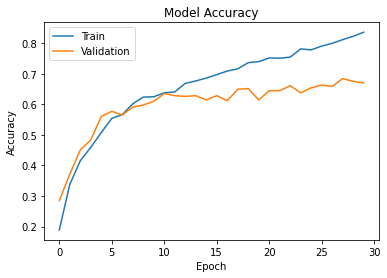

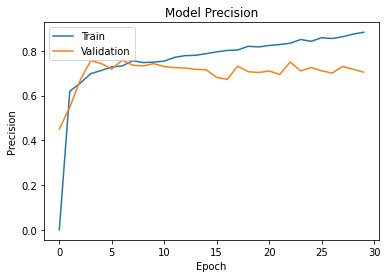

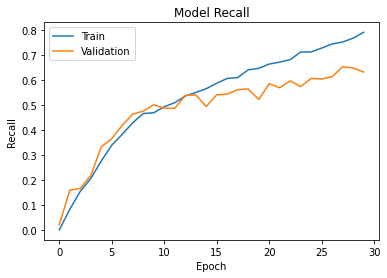

In [30]:
# accuracy over epochs
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# precision over epochs
plt.plot(history_1.history['precision'])
plt.plot(history_1.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# recall over epochs
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

All three metrics started to overfit at around 10 epochs. The metrics seemed to be increasing still after 30 epochs in the training data, indicating we want to continue with more than 10 epochs, but we need to imlement some techniques to reduce overfitting. We will try implementing batch normalization, dropout, and data augmentation in an attempt to improve our overall performance in all metrics and reduce overfitting.

### Evaluating Model Performance on Test Data

In [31]:
# test accuracy, precision, and recall
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

15/15 - 0s - loss: 1.1984 - accuracy: 0.6737 - recall: 0.6400 - precision: 0.7255 - 160ms/epoch - 11ms/step


Our test performance is pretty poor with 67% accuracy, 64% recall, and 73% precision. Our model was also overfitting, which is not good as well.

### Confusion Matrix

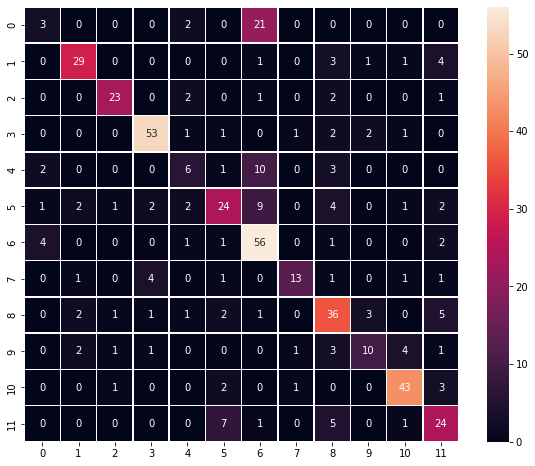

In [32]:
# Here we would get the output as probablities for each category
y_pred = model.predict(X_test_normalized)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)
plt.show()

Class 2, 6, and 10 were predicted fairly well. Class 0, 4, and 5 were not predicted very well.

## Model 2 

### Data Augmentation

In [84]:
# generate new images that have been transformed to augment our dataset
train_datagen = ImageDataGenerator(
                              rotation_range = 20, 
                              fill_mode = 'nearest'
                              )

In [42]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [43]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# add a dropout layer
model.add(Dropout(0.3))

# Adding another convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))

# Adding another max pooling layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

# add a dropout layer
model.add(Dropout(0.3))

# add a layer of batch normalization
model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation = 'relu'))

# add a dropout layer
model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation = 'softmax'))

# Using Adam optimizer
opt = Adam()

# Compile model
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Recall', 'Precision'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [44]:
# Epochs
epochs = 30

# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size = batch_size, 
                                       seed = 1,
                                       shuffle = False),
                    epochs = epochs,
                    steps_per_epoch = X_train_normalized.shape[0] // batch_size,
                    validation_data = (X_val_normalized, y_val_encoded),
                    verbose = 2)

Epoch 1/30
60/60 - 6s - loss: 2.4977 - accuracy: 0.1068 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.4664 - val_accuracy: 0.1355 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 6s/epoch - 97ms/step
Epoch 2/30
60/60 - 4s - loss: 2.1907 - accuracy: 0.2083 - recall: 0.0103 - precision: 0.3000 - val_loss: 2.3543 - val_accuracy: 0.2383 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 4s/epoch - 62ms/step
Epoch 3/30
60/60 - 4s - loss: 1.8303 - accuracy: 0.3436 - recall: 0.1295 - precision: 0.6079 - val_loss: 2.3034 - val_accuracy: 0.2827 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 4s/epoch - 64ms/step
Epoch 4/30
60/60 - 4s - loss: 1.6652 - accuracy: 0.3939 - recall: 0.1911 - precision: 0.6376 - val_loss: 2.1393 - val_accuracy: 0.3738 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 4s/epoch - 62ms/step
Epoch 5/30
60/60 - 4s - loss: 1.5440 - accuracy: 0.4446 - recall: 0.2466 - precision: 0.7095 - val_loss: 2.1445 - val_accuracy: 0.2710 - val_recall:

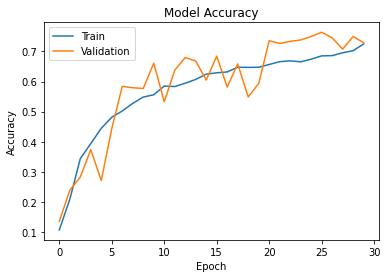

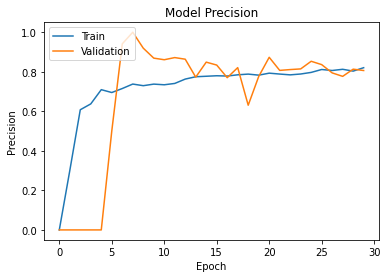

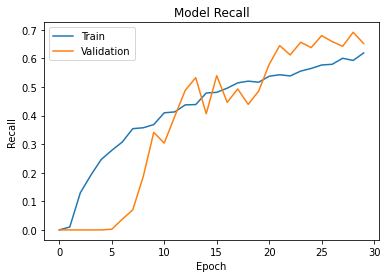

In [45]:
# accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# precision over epochs
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# recall over epochs
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

Our training curves are no longer smooth, which happens sometimes when implementing dropout and batch normalization to the model. However, it seems as though the validation performance is closer to the training performance in all three metrics, which is a sign we have reduced some of the overfitting. This will likely improve our performance in the test set.

In [48]:
# test accuracy, precision, and recall
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

15/15 - 0s - loss: 0.8830 - accuracy: 0.7284 - recall: 0.5979 - precision: 0.7933 - 82ms/epoch - 5ms/step


Our accuracy has improved a little in this model fro 67% to 73%. The recall dropped to 60%, but the precision increased to 79%.

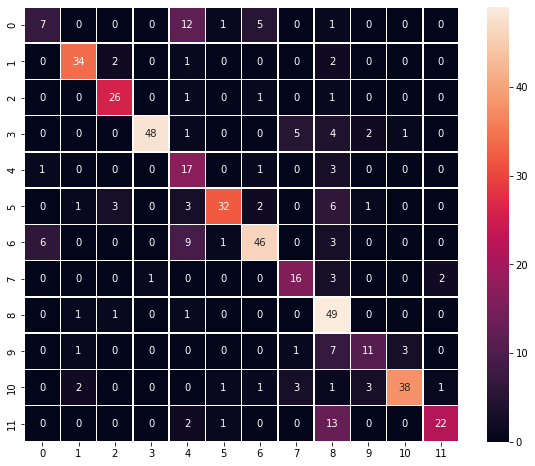

In [49]:
# Here we would get the output as probablities for each category
y_pred = model.predict(X_test_normalized)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)
plt.show()

Class 0, 6, 9, and 11 seem to be the most misclassified by this model. Class 1, 2, and 8 seem to be classified well by this model.

### Model 3 - Transfer Learning with VGG19

In [80]:
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19

# importing the convolutional layers from the VGG19 model
vgg_model = VGG19(weights = 'imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [81]:
# Making all the layers of the VGG19 model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [94]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [95]:
new_model = Sequential()

# Adding the convolutional part of the VGG19 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG19 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation = 'relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation = 'relu'))
new_model.add(Dense(12, activation = 'softmax'))

opt = Adam()

# Compile model
new_model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 20,090,684
Trainable params: 66,300
Non-tr

In [96]:
# Epochs
epochs = 30

# Batch size
batch_size = 64

history_vgg = new_model.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                       batch_size = batch_size, 
                                       seed = 1,
                                       shuffle = False),
                            epochs = epochs,
                            steps_per_epoch = X_train_normalized.shape[0] // batch_size,
                            validation_data = (X_val_normalized, y_val_encoded),
                            verbose = 2)

Epoch 1/30
60/60 - 6s - loss: 2.3188 - accuracy: 0.2054 - recall: 5.2868e-04 - precision: 1.0000 - val_loss: 2.1389 - val_accuracy: 0.2827 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - 6s/epoch - 98ms/step
Epoch 2/30
60/60 - 4s - loss: 2.0946 - accuracy: 0.2863 - recall: 0.0085 - precision: 0.5714 - val_loss: 1.9227 - val_accuracy: 0.3318 - val_recall: 0.0140 - val_precision: 0.6000 - 4s/epoch - 75ms/step
Epoch 3/30
60/60 - 4s - loss: 1.9396 - accuracy: 0.3262 - recall: 0.0486 - precision: 0.5993 - val_loss: 1.7954 - val_accuracy: 0.3855 - val_recall: 0.0561 - val_precision: 0.6486 - 4s/epoch - 75ms/step
Epoch 4/30
60/60 - 4s - loss: 1.8590 - accuracy: 0.3447 - recall: 0.0552 - precision: 0.6093 - val_loss: 1.7065 - val_accuracy: 0.4089 - val_recall: 0.0935 - val_precision: 0.7547 - 4s/epoch - 74ms/step
Epoch 5/30
60/60 - 4s - loss: 1.7772 - accuracy: 0.3841 - recall: 0.0891 - precision: 0.6335 - val_loss: 1.6542 - val_accuracy: 0.4159 - val_recall: 0.1215 - val_precision: 0.7

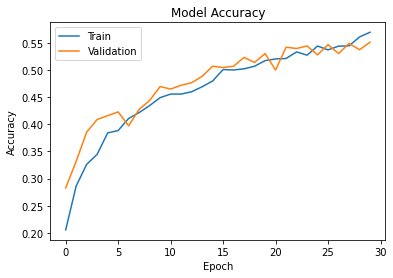

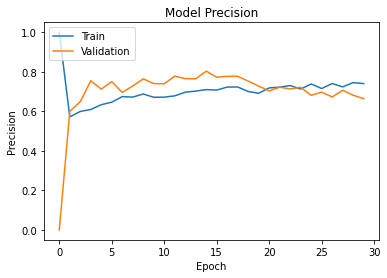

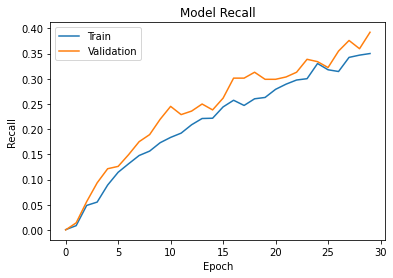

In [97]:
# accuracy over epochs
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# precision over epochs
plt.plot(history_vgg.history['precision'])
plt.plot(history_vgg.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# recall over epochs
plt.plot(history_vgg.history['recall'])
plt.plot(history_vgg.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

The model is not overfitting in any of the three metrics anymore, but the overall performance seems to have dropped from the last models.

In [98]:
# test accuracy, precision, and recall
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

15/15 - 1s - loss: 1.2137 - accuracy: 0.5621 - recall: 0.3916 - precision: 0.7126 - 790ms/epoch - 53ms/step


The accuracy is the lowest of the three models at 56%. The recall is also significantly lower than the other models at 39%, but the precision is decent at 71%.

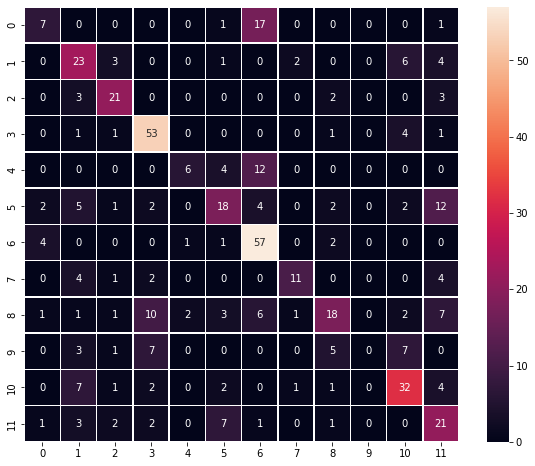

In [99]:
# Here we would get the output as probablities for each category
y_pred = new_model.predict(X_test_normalized)

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(
    confusion_matrix,
    annot = True,
    linewidths = .4,
    fmt = "d",
    square = True,
    ax = ax
)
plt.show()

This model predicts class 0, 4, 5, and 9 poorly, but it performed well when predicting class 2, 3, and 6.

# Conclusion and Takeaways

Overall, the 2nd model performed the best, although the metrics had shaky graphs through the epochs, the overall metric values were the best. The vgg model took the longest to train, and had the worst performance, so I would not pick that model for this problem. The first model was the simplest, and had relatively good performance, so a simple model makes the most sense in this case. It would be interesting to see if the Gaussian blurring had a negative affect on the model performance, as to the naked eye, it did not seem to add any information to the images after resizing them. In this case, the main takeaway is to keep the model simple, as overcomplicating the model with transfer learning had a negative affect on model performance. Although I was not able to create an accurate model to predict plant species, it is a good start to help agriculture workers improve their efficiency.